## Uber Rides Data Analysis Using Python

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
dataset = pd.read_csv("Uber Drives.csv")

dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# To find the shape of the dataset

dataset.shape

(1156, 7)

In [4]:
# To understand the data more deeply, we need to know about null value count, datatype and memory requirement of the dataset.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Data Preprocessing

In [5]:
# There are a lot of null values in PURPOSE column, so for that we will be filling the null values with a NOT keyword.

dataset['PURPOSE*'].fillna("NOT", inplace=True)

In [6]:
# Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], 
                                       errors='coerce')
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], 
                                     errors='coerce')

In [7]:
# Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

from datetime import datetime
 
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE*']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE*']).hour
 
#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [8]:
dataset.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [9]:
# Once we are done with creating new columns, we can now drop rows with null values.

dataset.dropna(inplace=True)

In [10]:
# It is also important to drop the duplicates rows from the dataset. To do that, refer the code below.

dataset.drop_duplicates(inplace=True)

### Data Visualization

In [ ]:
# In this section, we will try to understand and compare all columns.

In [ ]:
# Let’s start with checking the unique values in dataset of the columns with object datatype.

In [11]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
 
unique_values = {}

for col in object_cols:
  unique_values[col] = dataset[col].unique().size

unique_values

{'CATEGORY*': 2, 'START*': 175, 'STOP*': 186, 'PURPOSE*': 11, 'date': 291}

In [ ]:
# Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

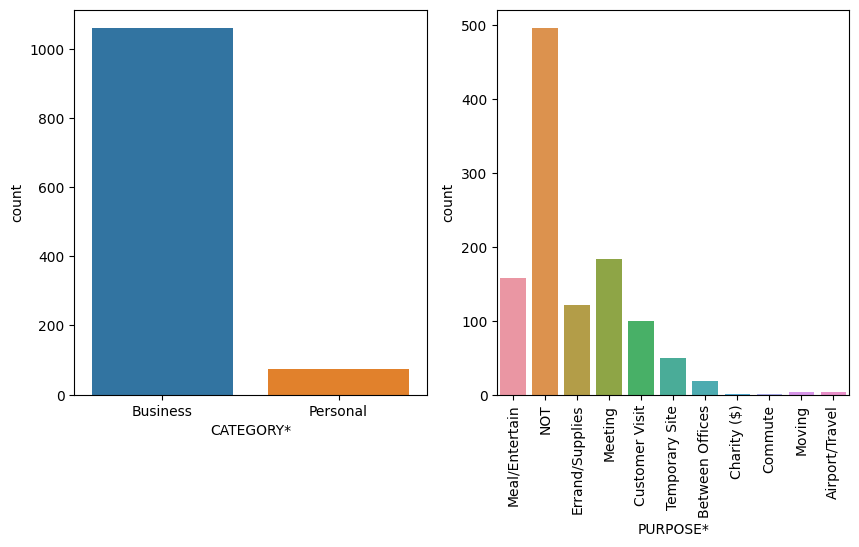

In [12]:
plt.figure(figsize=(10,5))
 
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY*',data=dataset)
plt.xticks(rotation=0)
 
plt.subplot(1,2,2)
sns.countplot(x='PURPOSE*', data=dataset)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Let’s do the same for time column, here we will be using the time column which we have extracted above.

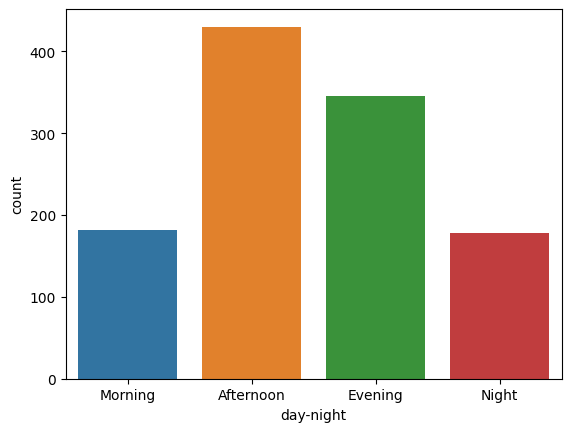

In [13]:
sns.countplot(x='day-night', data=dataset)
#plt.xticks(rotation=90)
plt.show()

In [ ]:
# Now, we will be comparing the two different categories along with the PURPOSE of the user.

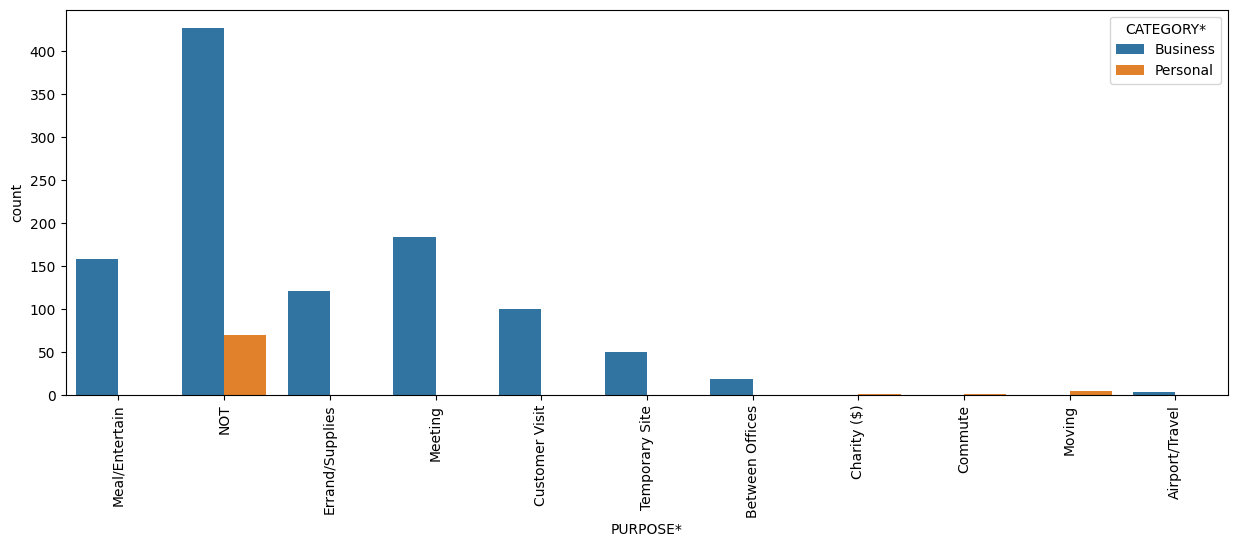

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE*', hue='CATEGORY*')
plt.xticks(rotation=90)
plt.show()

**Insights from the above count-plots :** 
- Most of the rides are booked for business purpose.
- Most of the people book cabs for Meetings and Meal / Entertain purpose.
- Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [ ]:
# As we have seen that CATEGORY and PURPOSE columns are two very important columns. 
# So now we will be using OneHotEncoder to categories them.

In [15]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY*', 'PURPOSE*']

OH_encoder = OneHotEncoder(sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)

dataset = pd.concat([df_final, OH_cols], axis=1)

In [16]:
dataset.head(3)

,START_DATE*,END_DATE*,START*,STOP*,MILES*,date,time,day-night,CATEGORY*_Business,CATEGORY*_Personal,...,PURPOSE*_Between Offices,PURPOSE*_Charity ($),PURPOSE*_Commute,PURPOSE*_Customer Visit,PURPOSE*_Errand/Supplies,PURPOSE*_Meal/Entertain,PURPOSE*_Meeting,PURPOSE*_Moving,PURPOSE*_NOT,PURPOSE*_Temporary Site
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# After that, we can now find the correlation between the columns using heatmap.

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 1154
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   START_DATE*               1135 non-null   datetime64[ns]
 1   END_DATE*                 1135 non-null   datetime64[ns]
 2   START*                    1135 non-null   object        
 3   STOP*                     1135 non-null   object        
 4   MILES*                    1135 non-null   float64       
 5   date                      1135 non-null   object        
 6   time                      1135 non-null   float64       
 7   day-night                 1135 non-null   category      
 8   CATEGORY*_Business        1135 non-null   float64       
 9   CATEGORY*_Personal        1135 non-null   float64       
 10  PURPOSE*_Airport/Travel   1135 non-null   float64       
 11  PURPOSE*_Between Offices  1135 non-null   float64       
 12  PURPOSE*_Charity ($)     

<Axes: >

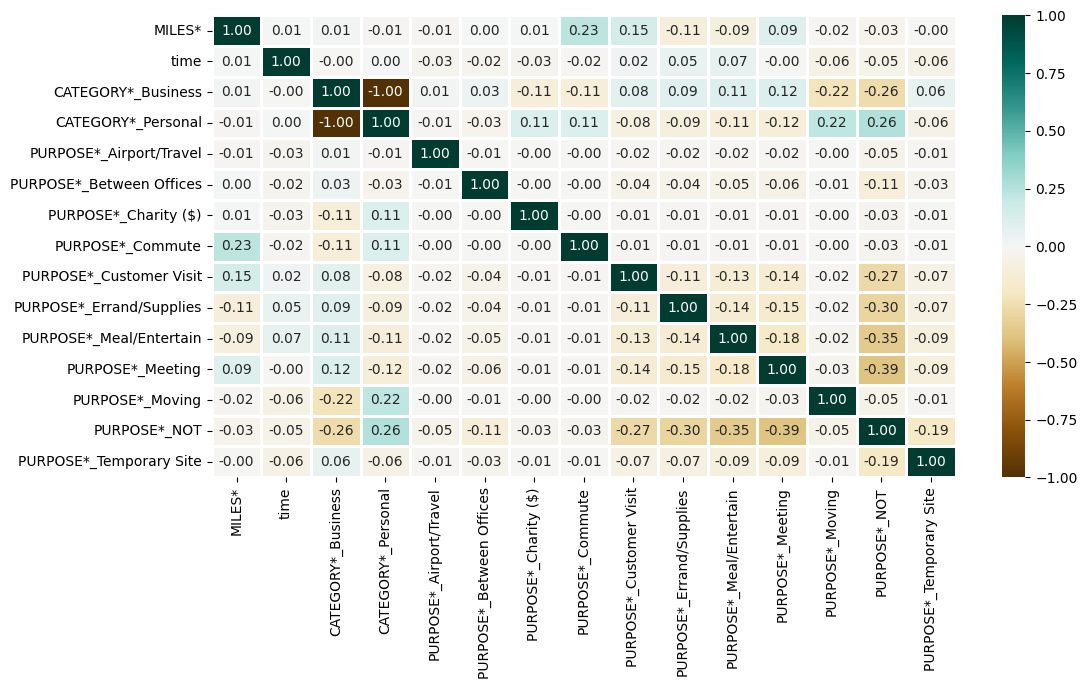

In [18]:
plt.figure(figsize=(12, 6))

corr = dataset.corr(method = 'pearson', numeric_only=True)

sns.heatmap(corr,
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

**Insights from the heatmap:**
- Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
- There is not much correlation between the features.

In [ ]:
# Now, as we need to visualize the month data. This can be same as done before (for hours).

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

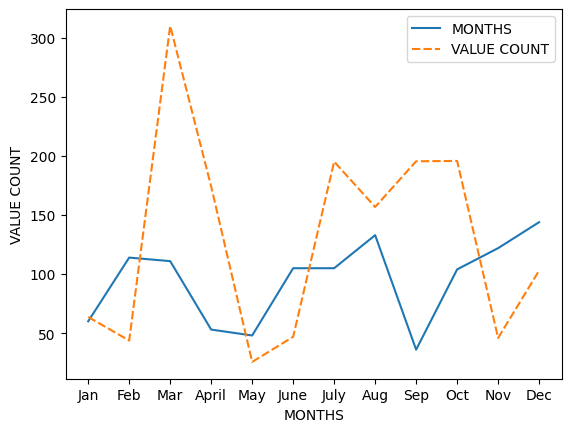

In [19]:
dataset['month'] = pd.DatetimeIndex(dataset['START_DATE*']).month

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

dataset['month'] = dataset.month.map(month_label)
 
mon = dataset.month.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('month',
                                                  sort=False)['MILES*'].max()})
 
p = sns.lineplot(data=df)

p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

**Insights from the above plot :**
- The counts are very irregular.
- Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.

In [ ]:
# Visualization for days data.

In [20]:
dataset['day'] = dataset['START_DATE*'].dt.weekday

day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

dataset['day'] = dataset['day'].map(day_label)

Text(0, 0.5, 'COUNT')

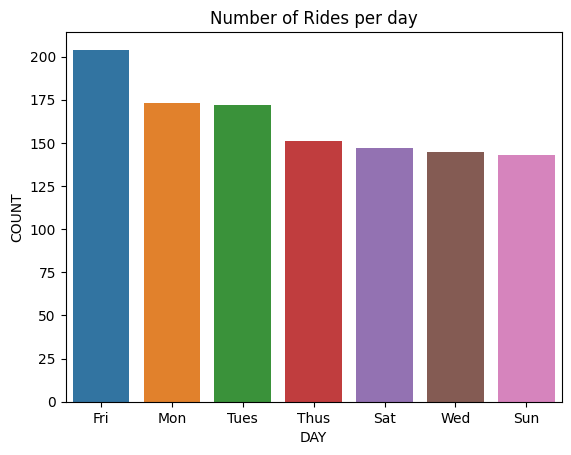

In [21]:
day_label = dataset.day.value_counts()

sns.barplot(x=day_label.index, y=day_label);

plt.title('Number of Rides per day')
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [ ]:
# Now, let’s explore the MILES Column.

# We can use boxplot to check the distribution of the column.

<Axes: >

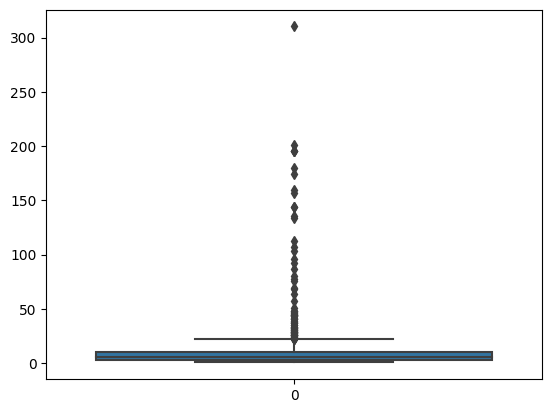

In [22]:
sns.boxplot(dataset['MILES*'])

> As the graph is not clearly understandable. Let’s zoom in it for values lees than 100.

<Axes: >

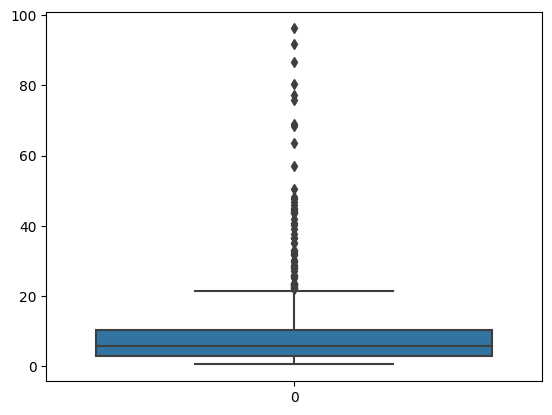

In [23]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

> It’s bit visible. But to get more clarity we can use distplot for values less than 40.

C:\Users\mishr\AppData\Local\Temp\ipykernel_12464\564126997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

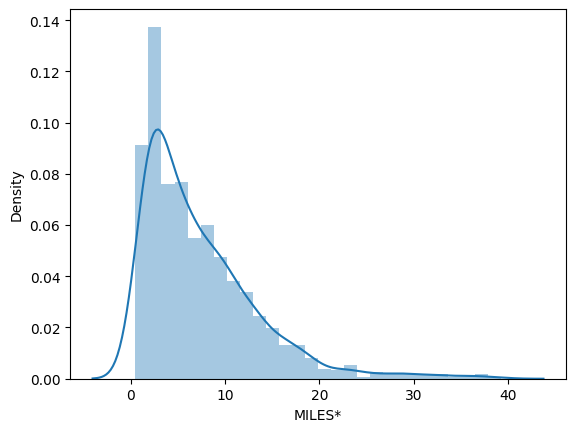

In [24]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])

**Insights from the above plots :**
- Most of the cabs booked for the distance of 4-5 miles.
- Majorly people chooses cabs for the distance of 0-20 miles.
- For distance more than 20 miles cab counts is nearly negligible.